In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [18]:
n_images = 2
n_calib = 2
grid = (10, 10)
range_z = (-40, 40)
particle_diameter = 2
img_shape = (1024, 1024)

In [19]:
xtot, ytot = img_shape
n_x, n_y = grid
n_particles = n_x * n_y
edge_x = xtot / (n_x + 1)
edge_y = ytot / (n_y + 1)

In [20]:
xy_coords = np.mgrid[edge_x:xtot - edge_x:complex(0, n_x),
            edge_y:ytot - edge_y:complex(0, n_y)].reshape(2, -1).T

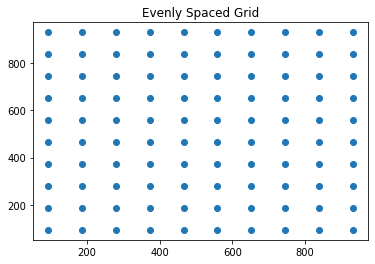

In [21]:
fig, ax = plt.subplots()
ax.scatter(xy_coords[:,0], xy_coords[:,1])
plt.title('Evenly Spaced Grid')
plt.show()

In [27]:
# copy the original array
xyc = xy_coords.copy()

# add a step size based on the x-value
xyc = xyc[:,0] + (xyc[:,0] - xyc[0,0]) / xyc[0,0] * 6

# restack the original array's y-coordinates
c = np.vstack((xyc, xy_coords[:,1])).T

# get only the inner coordinates to not change the image shape
c = c[10:90]

In [30]:
# calculate the step size per column
grid_step_size = (xyc[11] - xyc[0]) / xyc[0] * 6
print(grid_step_size)

6.38671875


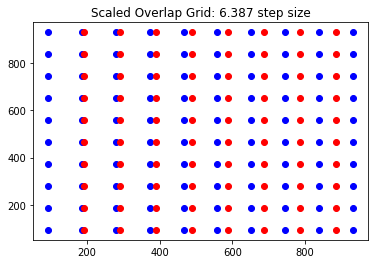

In [29]:
fig, ax = plt.subplots()
ax.scatter(xy_coords[:,0], xy_coords[:,1], color='blue')
ax.scatter(c[:,0], c[:,1], color='red')
plt.title('Scaled Overlap Grid: {} step size'.format(np.round(grid_step_size, 3)))
plt.show()

In [8]:
print(np.shape(xy_coords))
print(np.shape(c))

(100, 2)
(80, 2)


In [9]:
# stack the two arrays together
new_grid = np.vstack((xy_coords, c))
print(np.shape(new_grid))

(180, 2)


In [16]:
print(np.shape(new_grid))
print(new_grid[10:20,:])
print(new_grid[100:110,:])

(180, 2)
[[186.18181818  93.09090909]
 [186.18181818 186.18181818]
 [186.18181818 279.27272727]
 [186.18181818 372.36363636]
 [186.18181818 465.45454545]
 [186.18181818 558.54545455]
 [186.18181818 651.63636364]
 [186.18181818 744.72727273]
 [186.18181818 837.81818182]
 [186.18181818 930.90909091]]
[[192.18181818  93.09090909]
 [192.18181818 186.18181818]
 [192.18181818 279.27272727]
 [192.18181818 372.36363636]
 [192.18181818 465.45454545]
 [192.18181818 558.54545455]
 [192.18181818 651.63636364]
 [192.18181818 744.72727273]
 [192.18181818 837.81818182]
 [192.18181818 930.90909091]]


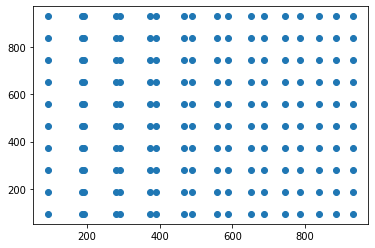

In [12]:
fig, ax = plt.subplots()
ax.scatter(new_grid[:,0], new_grid[:,1])
plt.show()